<a href="https://colab.research.google.com/github/Szczureczek1983/Repozytorium2/blob/main/Basic_NN_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
# Data generation
Obs = 1000
Xs = np.random.uniform(-10,10,(Obs,1))
Zs = np.random.uniform(-10,10,(Obs,1))
gen_inputs = np.column_stack((Xs,Zs))
noise = np.random.uniform(-1,1,(Obs, 1))
gen_targets = 2*Xs - 3*Zs + 5 + noise
np.savez('TF_intro', inputs = gen_inputs, targets = gen_targets)

np.savez(file name, arrays) - saves n-dimensional arrays in .npz format,
using a certain keyword (label) for each array.

In [ ]:
#solving with tensorflow
training_data = np.load('TF_intro.npz')
input_size = 2
output_size = 1
# building a model
# tf.keras.Sequential() function that specifies how the model will be laid down('stacks layers')
#tf.keras.layers.Dense(output size) takes the inputs provided to the model
  # and calculates the dot product of the inputs and the weights and adds the bias
  # it is similar to: output = np.dot(inputs, weights) + bias
# model.compile(optimizer, loss) configures the model for training
# SGD = Stochastic Gradient Descent
# tf.keras.optimizers.SGD(learning_rate) - stochastic gradient descent
  #optimizers, including support for learning rate, momentum, decay, etc.
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(output_size,
                                      kernel_initializer = tf.random_uniform_initializer(minval=-0.1, 
                                                                                maxval=0.1),
                                      bias_initializer=tf.random_uniform_initializer(minval=-0.1, 
                                                                                    maxval=0.1)
                             )
                          ])
custom_optimizer = tf.keras.optimizers.SGD(learning_rate = 0.02)
model.compile(optimizer = 'sgd', loss = 'mean_squared_error')
model.fit(training_data['inputs'], training_data['targets'], epochs = 100, verbose = 1)


Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 37.8233
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2048
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 1.4152
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6655
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.4437
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3877
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3628
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3623
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3576
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3650
Epoch 11/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3687
Epoch 12/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3655
Epoch 13/100
32/32 [================

In [ ]:
# Extract the weights and bias
weights = model.layers[0].get_weights()[0]
weights

array([[ 2.0127964],
       [-2.999935 ]], dtype=float32)

In [ ]:
bias = model.layers[0].get_weights()[1]
bias

array([5.0258045], dtype=float32)

In [ ]:
# Extract the outputs(make predictions)
# model.predict_on_batch(data) calculates the outputs given inputs
model.predict_on_batch(training_data['inputs'])

array([[ 20.363834  ],
       [ -0.36658907],
       [ 42.849487  ],
       [-13.02199   ],
       [  4.1889544 ],
       [ -5.429178  ],
       [-20.244368  ],
       [ 27.672224  ],
       [ 40.23237   ],
       [ 29.972153  ],
       [ 11.266823  ],
       [ 11.740053  ],
       [ -1.7196193 ],
       [ 41.71113   ],
       [-20.15993   ],
       [ 20.857092  ],
       [ 28.810757  ],
       [ 19.464363  ],
       [-26.3951    ],
       [  7.809005  ],
       [-39.869743  ],
       [  7.8709016 ],
       [ 27.652922  ],
       [ 53.646965  ],
       [ 10.31362   ],
       [ 10.823148  ],
       [ 23.229456  ],
       [  0.5577555 ],
       [ 25.444403  ],
       [-19.0268    ],
       [ 18.187334  ],
       [  2.2523894 ],
       [ 12.79277   ],
       [-10.046859  ],
       [ 30.05127   ],
       [  1.4624181 ],
       [ 28.053753  ],
       [ -0.6511903 ],
       [  2.6818514 ],
       [ -8.064923  ],
       [  4.2187867 ],
       [-23.36102   ],
       [-30.510511  ],
       [  3

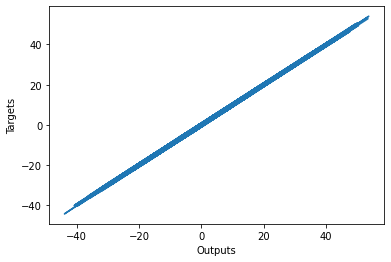

In [ ]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('Outputs')
plt.ylabel('Targets')
plt.show()